<a href="https://colab.research.google.com/github/hyeokjun0804/HJ_BigData_Maketing_Course/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B0%B8%EB%9F%B0%EC%8B%B1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train과 test를 나눠줌
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [2]:
from sklearn.feature_selection import SelectKBest, chi2

#데이터 지정(변수)
X= df.drop(["고객ID", "성별"], axis = 1)
Y = df["성별"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,12.171897,0.000516,True,이탈여부
1,1.762308,0.184771,True,총매출액
4,0.885780,0.346949,True,1회 평균매출액
7,1.845251,0.174776,True,고객등급
8,1.259044,0.262218,True,구매유형
11,0.910350,0.340352,True,거주지역
12,2.110759,0.146716,True,고객 나이대
13,2.238886,0.135030,True,거래기간
14,5.028139,0.025252,True,할인민감여부
18,1.079088,0.299261,True,평균 구매주기


In [3]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#일변량 통계기반 변수 선택
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")
#n_estimators: 트리 갯수, random_state: 시작점,  threshold: 기준점
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
1,총매출액,True
3,방문빈도,True
4,1회 평균매출액,True
5,할인권 사용 횟수,True
6,총 할인 금액,True
10,구매카테고리수,True
11,거주지역,True
13,거래기간,True
17,Monetary,True
18,평균 구매주기,True


In [4]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_under))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 135, 1: 135})


In [5]:
#오버 샘플링
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_over))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 565, 1: 565})


In [6]:
import seaborn as sns
import numpy as np

In [12]:
df["1회 평균매출액"].describe()

count    1.000000e+03
mean     3.521024e+05
std      3.124636e+05
min      2.708200e+04
25%      1.631242e+05
50%      2.582080e+05
75%      4.268310e+05
max      2.798500e+06
Name: 1회 평균매출액, dtype: float64

In [8]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


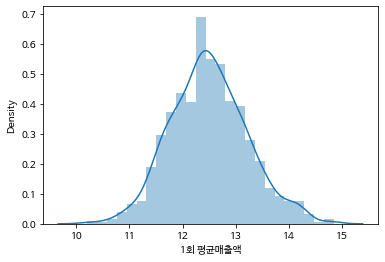

In [13]:
df["1회 평균매출액"] = np.log1p(df["1회 평균매출액"])

sns.distplot(df["1회 평균매출액"])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=['총매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수', 'Frequency', 'Monetary']
cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '고객 나이대']

X = df[num+cg] #독립변수
Y = df["1회 평균매출액"] #종속변수

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[ 0.69336175  1.69206734  0.23377898  0.80741016 -0.20091988  0.57229336
  0.          0.          1.          0.          1.          1.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          1.          0.          0.        ]


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [13.26655667 13.48189869 13.2538773  11.77284549 12.31925545 12.91458581
 11.8365029  12.87210916 12.07091413 12.44842757 12.61965147 12.63708532
 12.78921659 12.4611365  14.14444003 12.96978843 13.27016452 12.64490204
 11.51631192 13.11280644 12.3652344  12.8779992  12.32042022 12.5032167
 12.79108922 11.4139482  12.50334748 12.39942796 12.62408407 11.75045563
 12.91936341 12.50797259 12.35544675 14.10965372 13.32257673 12.72459213
 13.26280712 12.79476728 12.63110866 12.62367601 12.00210863 11.768645
 13.06221962 13.10898091 12.55506437 12.28353047 11.31345508 12.52444623
 12.34298341 12.22537454 11.79707009 12.47326142 12.8149208  12.54104831
 12.79390152 12.51572706 12.22775429 13.24052126 12.98930956 12.87544385
 11.65259674 11.87099218 13.82176166 12.50158821 12.97928255 11.97327483
 13.65137057 12.02048448 12.58628031 11.40877488 13.06830743 12.53162656
 12.55758538 12.47736943 12.94554353 12.50541002 12.73811784 12.86730949
 12.22649249 12.62943294 12.27510924 12

In [28]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 12.476
가중치(beta) [-0.     0.715  0.     0.    -0.    -0.     0.     0.    -0.    -0.
  0.     0.    -0.    -0.     0.    -0.     0.    -0.    -0.     0.
  0.     0.     0.    -0.    -0.    -0.     0.     0.    -0.     0.
 -0.     0.    -0.   ]


In [33]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["1회 평균매출액"])
Y_test_df

,1회 평균매출액
0,13.317777
1,13.489451
2,14.291557
3,11.573785
4,12.238128
...,...
295,12.896183
296,12.125285
297,12.278114
298,12.313419


In [34]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,13.266557
1,13.481899
2,13.253877
3,11.772845
4,12.319255
...,...
295,12.334108
296,12.533945
297,12.513789
298,12.553975


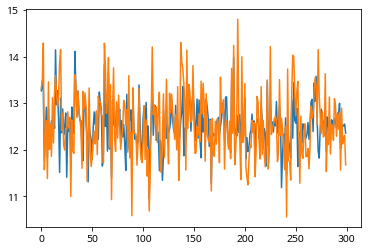

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)